<a href="https://colab.research.google.com/github/liuzheqi0723/capstone-fraud-detection/blob/YaoW/models/1_Datasets_Understanding_%26_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application for real-time fraudulent transaction detection**


#### Loading Datasets

Paths to the Datasets: <br>
  [link to Kaggle](https://www.kaggle.com/c/ieee-fraud-detection/data)<br>
  [link to Google Drive](https://drive.google.com/drive/folders/1_h09YxVU0BH4KgUy9su49zo3XX59oZ3d)<br>
  [link to Sample Datasets on Github](https://github.com/liuzheqi0723/capstone-fraud-detection/tree/main/assets)


In [1]:
### import libraries ###

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### A. Loading datasets from Google Drive
If you are running on Google Colab, and want to load datasets from Google Drive, using the following 2 cells.

In [2]:
## If you are running this code using Google Colab,
## Run it if it is the first time you running this notebook.

# Mount your google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# If you are loading the data from Google Drive, 
# Please create a shortcut for the 'Capstone' folder from shared drive to your own Googledrive.

path_train_id = "/content/drive/MyDrive/Capstone/Data/train_identity.csv"
raw_train_id = pd.read_csv(path_train_id)
raw_train_id.name = 'raw_train_id'
# raw_train_id.head()

path_train_trans = "/content/drive/MyDrive/Capstone/Data/train_transaction.csv"
raw_train_trans = pd.read_csv(path_train_trans)
raw_train_trans.name = 'raw_train_trans'
# raw_train_trans.head()

# Dataset is now stored in a Pandas Dataframe

##### B. Loading datasets from local drive.
Please comment out the code in the previous cells </br>
and use the code below to load the datasets from your local drive.

In [4]:
# path_train_id = "" # paste the path here.
# raw_train_id = pd.read_csv(path_train_id)
# raw_train_id.name = 'raw_train_id'
# # raw_train_id.head()

# path_train_trans = "" # paste the path here.
# raw_train_trans = pd.read_csv(path_train_trans)
# raw_train_trans.name = 'raw_train_trans'
# # raw_train_trans.head()

# # Dataset is now stored in a Pandas Dataframe

### Understanding the raw data

#### Define functions to decribe DataFrame.

In [5]:
# define functions used in the func 'df_description' in the next cell.
from pandas.core.frame import DataFrame

def null_info(df, axis=0):
    '''
    Return a DataFrame describes the Nans in df.
    df: DataFrame
     '''

    df_null = df.isnull().sum(axis=axis).to_frame()
    df_null.rename(columns={0: '#_Nans'}, inplace=True)
    if axis==0:
        num_total = df.shape[0]
    else:
        num_total = df.shape[1]

    df_null['%_Nans'] = round(df_null['#_Nans']/num_total*100, 2)
    df_null['#_Nans'] = df_null['#_Nans'].astype('int')

    return df_null



def dtype_info(df):
    '''
    Return a DataFrame describes the data type in df.
    df: DataFrame
    '''

    df_type = df.dtypes.to_frame()
    df_type.rename(columns={0: 'data_type'}, inplace=True)
    
    return df_type



def cols_info_df(df):
    '''
    Join the returns of func null_info() and dtype_info()
    Return a DataFrame describes the cols in df.
    df: DataFrame
    '''
    # generate decribing dfs using funcs defined above
    df_null = null_info(df) 
    df_type = dtype_info(df)

    # merge the decription dfs
    cols_info_df = df_null.merge(df_type, left_index=True, right_index=True,)  
    
    return cols_info_df



In [6]:
import missingno as msno

def df_description(df):
    '''
    Return basic info for the input df.
    df: DataFrame
    '''
    # print basic info
    print('For the DataFrame {}:\n'.format(df.name))
    print('The shape is: {}\n'.format(df.shape))

    # print cols info
    df_cols_info = cols_info_df(df) # func defined above
    print(df_cols_info,'\n')

    # if the number of cols is less than 50, print a graph describe the Nans.
    if len(df.columns)<50:
        print('The distribution of Nans:\n')
        msno.matrix(df)    # create a graph.

    return

In [7]:
def bin_chart(series, x_label:str, y_label:str):
    '''
    Plot a bin chart to show the %.
    '''

    n, bins, patches = plt.hist(series, 20, range=[0, 100], alpha=0.6)

    plt.xlabel(x_label)
    plt.ylabel(y_label)


    plt.show()

#### Describe the datasets

**train_identity.csv**<br>
>Variables in this table are identity information:<br>
network connection information (IP, ISP, Proxy, etc) and <br>
digital signature (UA/browser/os/version, etc) associated with transactions.<br> The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement.<br>

In [8]:
# take a look at sample data from 'raw_train_id'
raw_train_id.sample(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
107589,3390704,-20.0,194276.0,NaN,NaN,-12.0,-34.0,NaN,NaN,NaN,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
124664,3484007,0.0,89873.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,mobile safari generic,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
112332,3414800,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40262,3084703,-5.0,48817.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
136977,3543094,-5.0,440198.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows


For the DataFrame raw_train_id:

The shape is: (144233, 41)

               #_Nans  %_Nans data_type
TransactionID       0    0.00     int64
id_01               0    0.00   float64
id_02            3361    2.33   float64
id_03           77909   54.02   float64
id_04           77909   54.02   float64
id_05            7368    5.11   float64
id_06            7368    5.11   float64
id_07          139078   96.43   float64
id_08          139078   96.43   float64
id_09           69307   48.05   float64
id_10           69307   48.05   float64
id_11            3255    2.26   float64
id_12               0    0.00    object
id_13           16913   11.73   float64
id_14           64189   44.50   float64
id_15            3248    2.25    object
id_16           14893   10.33    object
id_17            4864    3.37   float64
id_18           99120   68.72   float64
id_19            4915    3.41   float64
id_20            4972    3.45   float64
id_21          139074   96.42   float64
id_22          1390

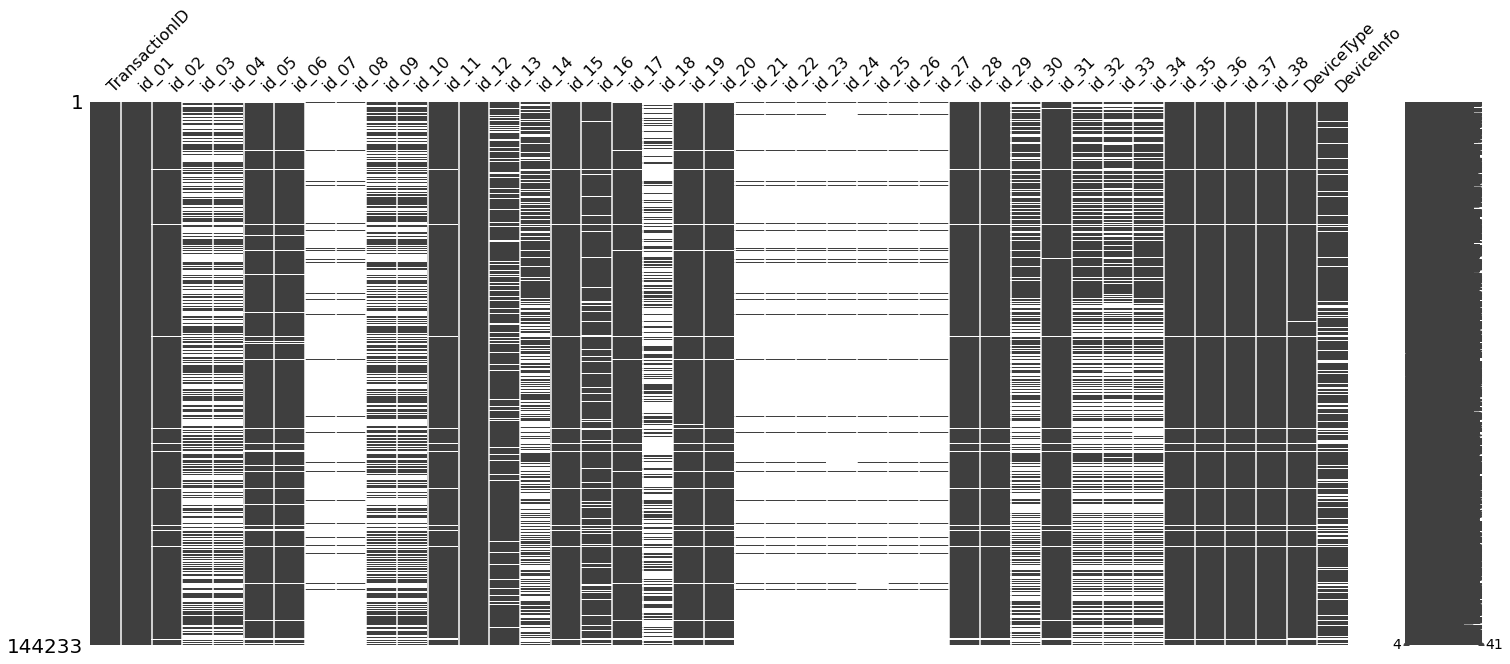

In [9]:
# use funcs defined in fomer cells to describe the dataset.
df_description(raw_train_id)

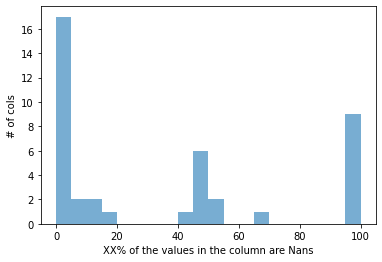

In [10]:
# density of Nans in cols
bin_chart(cols_info_df(raw_train_id)['%_Nans'], 'XX% of the values in the column are Nans', '# of cols')

**train_transaction.csv**


>All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying.

`TransactionDT`: timedelta from a given reference datetime (not an actual timestamp)<br>
  TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.

`TransactionAMT`: transaction payment amount in USD.<br>
  Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?

`ProductCD`: product code, the product for each transaction.<br>
  Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.

`card1` - `card6`: payment card information.<br>
  Such as card type, card category, issue bank, country, etc.

`addr`: both addresses are for purchaser.<br>
  addr1 as billing region.<br>
  addr2 as billing country.<br>

`dist`: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.

`P_` and `(R__) emaildomain`: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”

`C1`-`C14`: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

`D1`-`D15`: timedelta, such as days between previous transaction, etc.

`M1`-`M9`: match, such as names on card and address, etc.

`Vxxx`: Vesta engineered rich features, including ranking, counting, and other entity relations.<br>
  For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.



In [11]:
# take a look at sample data from 'raw_train_trans'
raw_train_trans.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
238046,3225046,0,5614215,25.95,W,7919,194.0,150.0,mastercard,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490313,3477313,0,12782160,59.00,W,16085,297.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343959,3330959,0,8471987,226.00,W,7585,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21834,3008834,0,576560,46.50,W,10486,514.0,150.0,mastercard,219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224972,3211972,0,5323650,117.00,W,12556,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# use defined funcs to describe the dataset.
df_description(raw_train_trans)

For the DataFrame raw_train_trans:

The shape is: (590540, 394)

                #_Nans  %_Nans data_type
TransactionID        0    0.00     int64
isFraud              0    0.00     int64
TransactionDT        0    0.00     int64
TransactionAmt       0    0.00   float64
ProductCD            0    0.00    object
...                ...     ...       ...
V335            508189   86.05   float64
V336            508189   86.05   float64
V337            508189   86.05   float64
V338            508189   86.05   float64
V339            508189   86.05   float64

[394 rows x 3 columns] 



### Clean the datasets

#### Define functions to clean the datasets.

In [13]:
from pandas.core.frame import DataFrame

def clean_df(df: DataFrame, \
             cols_drop: list, rows_drop: list, cols_to_category: list):
    '''
    Return a cleaned df.
    '''

    cleaned_df = df
    cleaned_df = cleaned_df.drop(columns=cols_drop) # drop cols
    cleaned_df = cleaned_df.drop(labels=rows_drop, axis=0) # drop rows

    for col in cols_to_category: # convert dtypes
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].astype('category')

    return cleaned_df



def get_dummies(df: DataFrame, cols: list):
    '''
    Get the dummy values for the categorical columns.
    Append the it to the input df and drop the original cols.

    df: data.
    cols: the name of the columns need to be converted.
    '''

    for col in cols:
        if col in df.columns:
            col_dummies = pd.get_dummies(data=df[col])
            df = pd.concat([df, col_dummies], axis=1)
            df = df.drop(col, axis=1)

    
    return df

#### Clean 'raw_train_id'





##### Drop cols and rows, Convert data types

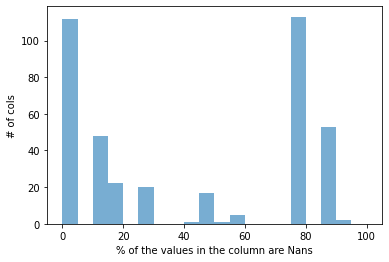

The following columnes has more than 40% of Nan values:
['id_03', 'id_04', 'id_07', 'id_08', 'id_09', 'id_10', 'id_14', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30', 'id_32', 'id_33', 'id_34']
We suggest to drop all these columns in the dataset.


In [14]:
### filter out cols ###

# density of Nans in cols
bin_chart(cols_info_df(raw_train_trans)['%_Nans'], '% of the values in the column are Nans', '# of cols')

# filter out the columns with more than 40% Nans.
cols_info_id = cols_info_df(raw_train_id)
cols_drop_id = cols_info_id[cols_info_id['%_Nans'] > 40]
cols_drop_id_list =  cols_drop_id.index.to_list() # list of columns to drop

if len(cols_drop_id_list) is not 0:
    print('The following columnes has more than 40% of Nan values:\n{}'.format(cols_drop_id_list))
    print('We suggest to drop all these columns in the dataset.')
else:
     print('We suggest no columns need to be dropped')

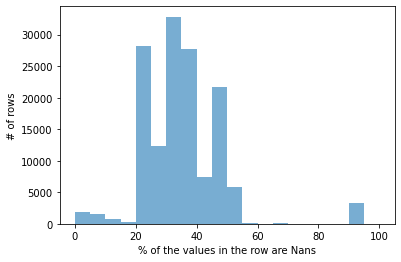

In 9400 rows, there are more than 50% of values are null.

We suggest to drop all these rows in the dataset.


In [15]:
### filter out rows ###

df_row_null_id = null_info(raw_train_id, axis=1)

# density of Nans in rows
bin_chart(df_row_null_id['%_Nans'], '% of the values in the row are Nans', '# of rows')

# filter out the rows with more than 50% Nans.
rows_drop_id = df_row_null_id[df_row_null_id['%_Nans'] > 50]
rows_drop_id_list =  rows_drop_id.index.to_list() # list of rows to drop

if len(rows_drop_id_list) is not 0:
     print('In {} rows, there are more than 50% of values are null.\n'.format(len(rows_drop_id_list)))
     print('We suggest to drop all these rows in the dataset.')
else:
     print('We suggest no rows need to be dropped')

In [16]:
### filter out cols need convert dtypes ###

# count the unique values in the col with data type of 'object',
# see if it can be converted into 'category' type.
cols_obj_id = cols_info_id[cols_info_id['data_type'] == 'object'] # filter out cols with datatype = 'object'

cols_obj_id_list = cols_obj_id.index.to_list() # make the col names to a list

for col in cols_obj_id_list:
     cols_obj_id.loc[col, '#_uniques'] = raw_train_id[col].nunique() # count and append # of uniques

print('The datatype of these cols are object:\n',cols_obj_id,'\n')
# print(cols_obj_id_list)

# number of uniques in each cols are much small than the number of rows(140K+),
# all the 'object' cols can be considered as categorical cols.

The datatype of these cols are object:
             #_Nans  %_Nans data_type  #_uniques
id_12            0    0.00    object        2.0
id_15         3248    2.25    object        3.0
id_16        14893   10.33    object        2.0
id_23       139064   96.42    object        3.0
id_27       139064   96.42    object        2.0
id_28         3255    2.26    object        2.0
id_29         3255    2.26    object        2.0
id_30        66668   46.22    object       75.0
id_31         3951    2.74    object      130.0
id_33        70944   49.19    object      260.0
id_34        66428   46.06    object        4.0
id_35         3248    2.25    object        2.0
id_36         3248    2.25    object        2.0
id_37         3248    2.25    object        2.0
id_38         3248    2.25    object        2.0
DeviceType    3423    2.37    object        2.0
DeviceInfo   25567   17.73    object     1786.0 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
### clean dataset with info and analysis above ###

clean_train_id = clean_df(raw_train_id, cols_drop_id_list, rows_drop_id_list, cols_obj_id_list) # drop cols and rows

# clean_train_id = get_dummies(clean_train_id, cols_obj_id_list) # get dummies


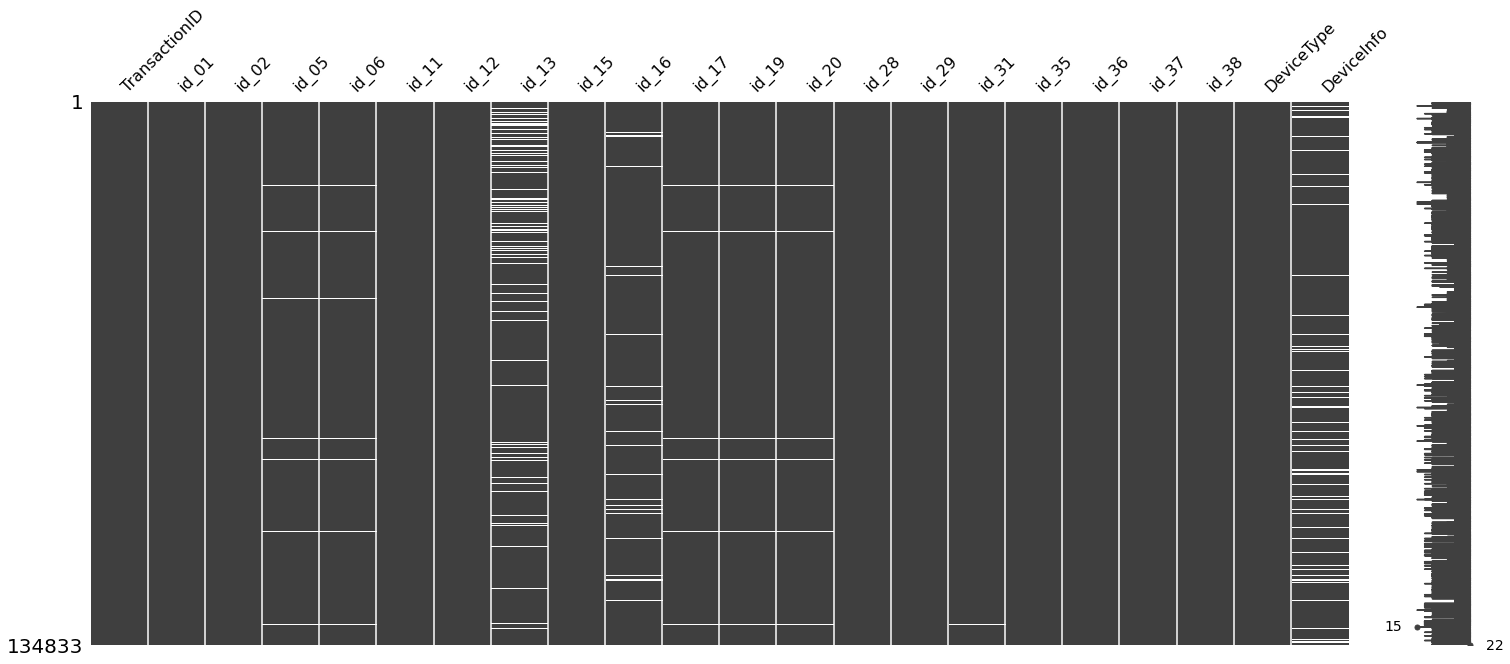

In [18]:
# Plot how the nan values looks after dropping part of the rows and cols.
msno.matrix(clean_train_id)

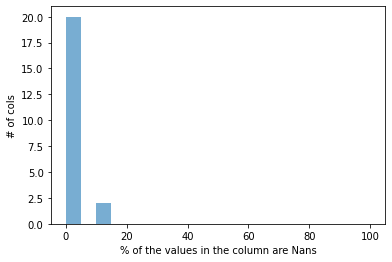

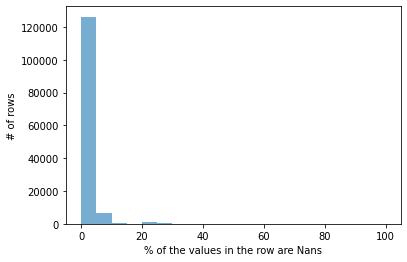

In [19]:
# Plot the distribution of percentage of nan values after dropping part of the cols and rows.

# density of Nans in cols
bin_chart(null_info(clean_train_id, axis=0)['%_Nans'], '% of the values in the column are Nans', '# of cols')

# density of Nans in rows
bin_chart(null_info(clean_train_id, axis=1)['%_Nans'], '% of the values in the row are Nans', '# of rows')

#### Clean 'raw_train_trans'.





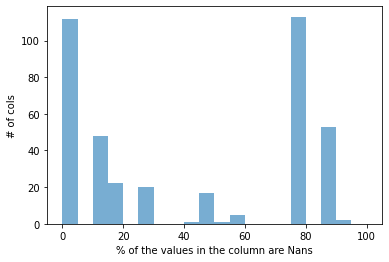

In 168 columns, there are more than 60% of values are null.

The following columnes has more than 60% of Nan values:
['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V2

In [20]:
### filter out cols ###

# density of Nans in cols
bin_chart(null_info(raw_train_trans, axis=0)['%_Nans'], '% of the values in the column are Nans', '# of cols')

# filter out the columns with more than 60% Nans.
cols_info_trans = cols_info_df(raw_train_trans)
cols_drop_trans = cols_info_trans[cols_info_trans['%_Nans'] > 60]
cols_drop_trans_list =  cols_drop_trans.index.to_list() # list of columns to drop

if len(cols_drop_trans_list) is not 0:
    print('In {} columns, there are more than 60% of values are null.\n'.format(len(cols_drop_trans_list)))
    print('The following columnes has more than 60% of Nan values:\n{}'.format(cols_drop_trans_list))
    print('We suggest to drop all these columns in the dataset.')
else:
    print('We suggest no columns need to be dropped')




In [21]:
cols_drop_trans_list[:10]

['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138']

##### *DISCUSSION on columns with high % of null should be dropped in 'raw_train_trans':<br>*

in `raw_train_trans`, there are **168** cols which contains more **60%** of Nans:


1. `dist2`: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.<br>
>Since 93% of the values are null, and filling Nans with an arbitrary value is meaningless, this column could be **dropped**.

2. `R_emaildomain`: recipient email domain. Certain transactions don't need recipient, so R_emaildomain is null.
>From the data description above, we can infer that the null values acturally indicates a certain kind of transactions.<br>
This col will be **kept**, and **fill the Nan with 0**.


3. `CXX & Dxx`:   timedelta, such as days between previous transaction, etc.
>This col will be **kept**, and **fill with most frequent value in the col**.

4. `Vxxx`:  The col name starts with letter V are Vesta engineered rich features, including ranking, counting, and other entity relations.<br>
They are designed to be so.<br>
>All these columns should be **kept**, and **fill the Nan with some value never shows up in the column, like -1**.






In [22]:
# With the discussion above, 
# Updated 'cols_drop_trans_list'.
cols_drop_trans_list = ['dist2']

In [23]:
### filter out cols ###

# will do it after fill all the Nans in cols.

In [24]:
### filter out cols need convert dtypes ###

# count the unique values in the col with data type of 'object',
# see if it can be converted into 'category' type.
cols_obj_trans = cols_info_trans[cols_info_trans['data_type'] == 'object'] # filter out cols with datatype = 'object'

cols_obj_trans_list = cols_obj_trans.index.to_list() # make the col names to a list

for col in cols_obj_trans_list:
    cols_obj_trans.loc[col, '#_uniques'] = raw_train_trans[col].nunique() # count and append # of uniques

print(cols_obj_trans)

print('The features of #_uniques:{}\n'.format(cols_obj_trans['#_uniques'].describe()))

# Since the max value of #_uniques is 60, and we have more than 540k records, 
# all the 'object' cols can be considered as categorical cols.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


               #_Nans  %_Nans data_type  #_uniques
ProductCD           0    0.00    object        5.0
card4            1577    0.27    object        4.0
card6            1571    0.27    object        4.0
P_emaildomain   94456   15.99    object       59.0
R_emaildomain  453249   76.75    object       60.0
M1             271100   45.91    object        2.0
M2             271100   45.91    object        2.0
M3             271100   45.91    object        2.0
M4             281444   47.66    object        3.0
M5             350482   59.35    object        2.0
M6             169360   28.68    object        2.0
M7             346265   58.64    object        2.0
M8             346252   58.63    object        2.0
M9             346252   58.63    object        2.0
The features of #_uniques:count    14.000000
mean     10.785714
std      20.662782
min       2.000000
25%       2.000000
50%       2.000000
75%       4.000000
max      60.000000
Name: #_uniques, dtype: float64



In [26]:
clean_train_trans = clean_df(raw_train_trans, cols_drop_trans_list, [], cols_obj_trans_list) # drop cols

clean_train_trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Write 'clean_train_id' and 'clean_train_trans' to .csv


In [27]:
clean_train_id.to_csv('clean_train_id.csv')
!cp clean_train_id.csv "drive/MyDrive/Capstone/Data/"

clean_train_trans.to_csv('clean_train_trans.csv')
!cp clean_train_trans.csv "drive/MyDrive/Capstone/Data/"